In [1]:
import xarray as xr
import numpy as np
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seastar as ss
# import seastar.oscar
# import seastar.retrieval
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import re
# import os
# from scipy import interpolate
from scipy.optimize import curve_fit

In [2]:
def iqr(da, dim):
    """Calculates interquartile range"""
    return (da.quantile(q=0.75, dim=dim) - da.quantile(q=0.25, dim=dim)).rename("iqr")


In [3]:
# Data load and pre-processing
version = 'v20221104'

oscar_path = "../DATA/OSCAR/" + version + "/matlab-pre-processed/"

file_time_triplets = ss.utils.tools.find_file_triplets(oscar_path)

print('OSCAR L1 processing - version ' + version)
print('-------------------')
print('File path :', oscar_path)
print('-------------------')
for i in range(len(file_time_triplets)):
    print('File index :', i, ',', 'Aquisition time :', file_time_triplets[i][0], ',', 'File list indices :', file_time_triplets[i][1])

# Match tracks in the star pattern from track names and times in the DAR_v6.0 to file aquisition times
star_pattern_tracks={
    'Track_L1' : 0,
    'Track_1a' : 1,
    'Track_2a' : 2,
    'Track_1b' : 3,
    'Track_11' : 4,
    'Track_12' : 5,
    'Track_13' : 6,
    'Track_14' : 7,
    'Track_15' : 8,
    'Track_16' : 9,
    'Track_17' : 10,
    'Track_18' : 11}


OSCAR L1 processing - version v20221104
-------------------
File path : ../DATA/OSCAR/v20221104/matlab-pre-processed/
-------------------
File index : 0 , Aquisition time : 20220522T052218 , File list indices : [2, 24, 26]
File index : 1 , Aquisition time : 20220522T053942 , File list indices : [12, 29, 44]
File index : 2 , Aquisition time : 20220522T054805 , File list indices : [22, 39, 40]
File index : 3 , Aquisition time : 20220522T055458 , File list indices : [3, 16, 36]
File index : 4 , Aquisition time : 20220522T062018 , File list indices : [0, 5, 21]
File index : 5 , Aquisition time : 20220522T062620 , File list indices : [9, 23, 33]
File index : 6 , Aquisition time : 20220522T063239 , File list indices : [6, 17, 35]
File index : 7 , Aquisition time : 20220522T063906 , File list indices : [7, 8, 34]
File index : 8 , Aquisition time : 20220522T064459 , File list indices : [14, 25, 38]
File index : 9 , Aquisition time : 20220522T065108 , File list indices : [11, 30, 31]
File index

In [4]:
# vars_to_keep = [
#     'AntennaAzimuthImage',
#     'IncidenceAngleImage',
#     'RadialSurfaceVelocity',
#     'Coherence',
#     'Intensity',
#     'Interferogram',
#     'OrbitHeadingImage',
#     'SquintImage'
# ]

In [84]:
vars_to_drop = [
#     'SigmaImageSingleLookRealPart',                                             
#     'SigmaImageSingleLookImaginaryPart',                                        
#     'LatImage',                                                                 
#     'LonImage',                                                                 
    'DEMImage',                                                                 
    'OrbLatImage',                                                              
    'OrbLonImage',                                                              
    'OrbHeightImage',                                                           
    'OrbTimeImage',                                                             
    'OrbitImage',                                                               
    'OrbitLatitude',                                                            
    'OrbitLongitude',                                                           
    'OrbitHeight',                                                              
    'OrbitHeading',                                                             
    'OrbitRoll',                                                                
    'OrbitPitch',                                                               
    'TxElevationGain',                                                          
    'TxAzimuthGain',                                                            
    'RxElevationGain',                                                          
    'RxAzimuthGain',                                                            
    'ModelTransformationTag',                                                   
    'StartYear',                                                                
    'StartMonth',                                                               
    'StartDay',                                                                 
    'StartHour',                                                                
    'StartMin',                                                                 
    'StartSec',                                                                 
    'FinalYear',                                                                
    'FinalMonth',                                                               
    'FinalDay',                                                                 
    'FinalHour',                                                                
    'FinalMin',                                                                 
    'FinalSec',                                                                 
#     'TxPolarization',                                                           
#     'RxPolarization',                                                           
#     'LookDirection',                                                            
    'TxPointEl',                                                                
    'TxPointAz',                                                                
    'RxPointEl',                                                                
    'RxPointAz',                                                                
#     'CentralFreq',                                                              
    'TransmittedBandWidth',                                                     
    'MeanForwardVelocity',                                                      
    'PRF',                         
    'DopplerPresumming',                                                        
    'WindowFunction',                                                           
    'MinProcessedDoppler',                                                      
    'MaxProcessedDoppler',                                                      
    'Latitude11',                                                               
    'Longitude11',                                                              
    'Latitude12',                                                               
    'Longitude12',                                                              
    'Latitude21',                                                               
    'Longitude21',                                                              
    'Latitude22',                                                               
    'Longitude22',                                                              
    'UTMZone',                                                                  
    'Hemisphere',                                                               
    'SystemType',                                                               
    'Dummy',                                                                    
#     'SigmaImageSingleLookRealPartSlave',                                        
#     'SigmaImageSingleLookImaginaryPartSlave',                                   
    'OrbLatImageSlave',                                                         
    'OrbLonImageSlave',                                                         
    'OrbHeightImageSlave',                                                      
    'OrbTimeImageSlave',                                                        
    'CalImageSlave',                                                            
    'OrbitImageSlave',                                                          
    'TxElevationGainSlave',                                                     
    'TxAzimuthGainSlave',                                                       
    'RxElevationGainSlave',                                                     
    'RxAzimuthGainSlave',                                                       
    'StartYearSlave',                                                           
    'StartMonthSlave',                                                          
    'StartDaySlave',                                                            
    'StartHourSlave',                                                           
    'StartMinSlave',                                                            
    'StartSecSlave',                                                            
    'FinalYearSlave',                                                           
    'FinalMonthSlave',                                                          
    'FinalDaySlave',                                                            
    'FinalHourSlave',                                                           
    'FinalMinSlave',                                                            
    'FinalSecSlave',                                                            
    'TxPolarizationSlave',                                                      
    'RxPolarizationSlave',                                                      
    'SystemTypeSlave',                                                          
#     'IncidenceAngleImage', 
    'LookAngleImage',                                                           
#     'SquintImage',                                                              
    'OrbitHeadingImage',                                                        
    'OrbitYawImage',                                                            
    'SigmaSLCMaster',                                                           
    'SigmaSLCSlave',                                                            
    'IntensityAvgComplexMasterSlave',                                           
#     'Intensity',                                                                
#     'Interferogram',                                                            
#     'IntensityAvgMaster',                                                       
#     'IntensityAvgSlave',                                                        
#     'Coherence',                                                                
#     'Polarization',                                                             
#     'AntennaAzimuthImage',                                                      
#     'TimeLag',                                                                  
#     'CentralWavenumber',                                                        
#     'RadialSurfaceVelocity',        
]

In [85]:
# Compute L1C - Sigma0 + RVL
dsl1 = dict()
for track in star_pattern_tracks.keys(): # Loop through star pattern tracks
    file_index = star_pattern_tracks[track]
    ds = ss.utils.readers.load_OSCAR_data(oscar_path, file_time_triplets[file_index][1])
    antenna_ident = ss.utils.tools.identify_antenna_location_from_filename(oscar_path, file_time_triplets[file_index][1])
    print('Processing file index',file_index)
    # L1 processing
    for i in list(ds.keys()):
        ds[i] = ss.oscar.level1.compute_multilooking_Master_Slave(ds[i], window=7)
        ds[i] = ss.oscar.level1.check_antenna_polarization(ds[i])
        ds[i] = ss.oscar.level1.compute_antenna_azimuth_direction(ds[i], antenna=antenna_ident[list(ds.keys()).index(i)])
        if 'SigmaImageSingleLookRealPartSlave' in ds[i].data_vars:
            ds[i] = ss.oscar.level1.compute_time_lag_Master_Slave(ds[i], options='from_SAR_time')
            ds[i] = ss.oscar.level1.compute_radial_surface_velocity(ds[i])
        ds[i].drop_vars(vars_to_drop, errors='ignore')
    #Build L1 dataset
    ds = ss.oscar.level1.fill_missing_variables(ds, antenna_ident)
    dsl1[track] = ss.oscar.level1.merge_beams(ds, antenna_ident)


Processing file index 0


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 1


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 2


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 3


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 4


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 5


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 6


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 7


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 8


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 9


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 10


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 11


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [86]:
coords_list = [
    'AntennaAzimuthImage',
    'IncidenceAngleImage',
]
vars_list = [
    'RadialSurfaceVelocity',
    'Coherence',
    'Intensity',
    'Interferogram',
    'OrbitHeadingImage',
    'SquintImage',
    'IntensityAvgMaster',                                                       
    'IntensityAvgSlave',
]
all_star_tracks_list = ['Track_L1', 'Track_1a', 'Track_2a', 'Track_1b', 'Track_11', 'Track_12', 'Track_13', 'Track_14', 'Track_15', 'Track_16', 'Track_17', 'Track_18']
all_track_list = [0, 100, 200, 101, 11, 12, 13, 14, 15, 16, 17, 18]
dsl1b = [None] * len(all_star_tracks_list)
for ii, track in enumerate(all_star_tracks_list):
    dsl1b[ii] = dsl1[track][coords_list + vars_list]
#      = ds.set_coords(coords_list)
L1 = xr.concat(dsl1b, dim='Track')
L1['Track'] = all_track_list

In [87]:
L1['SquintFixed'] = ( ['Track', 'Antenna', 'CrossRange', 'GroundRange', ], 
    np.stack(
        [-45 * np.ones_like(L1.SquintImage.sel(Antenna='Aft')),
         +45 * np.ones_like(L1.SquintImage.sel(Antenna='Fore')),
         np.zeros_like(L1.SquintImage.sel(Antenna='Mid'))
        ], 
        axis=1
    )
)
L1['AntennaAzimuthSquintFixed'] = np.mod(L1.OrbitHeadingImage + 270 + L1.SquintFixed, 360)

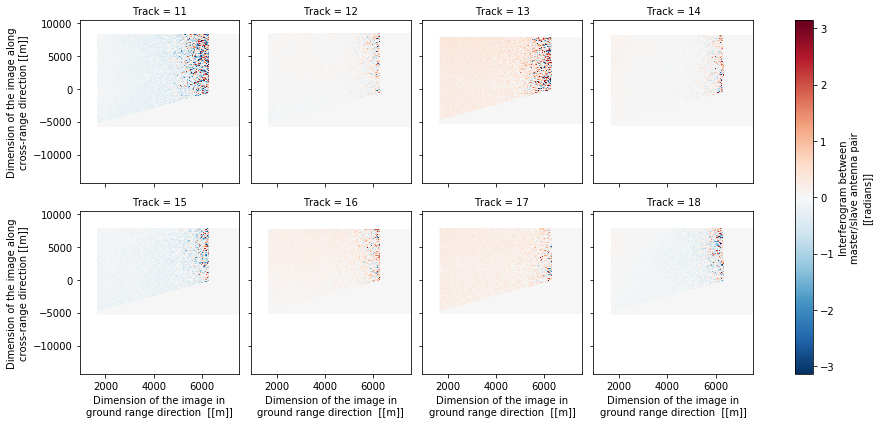

In [11]:
L1.sel(Track=[11,12,13,14,15,16,17,18])\
    .sel(Antenna='Fore')\
    .Interferogram\
    .plot(col='Track',col_wrap=4)

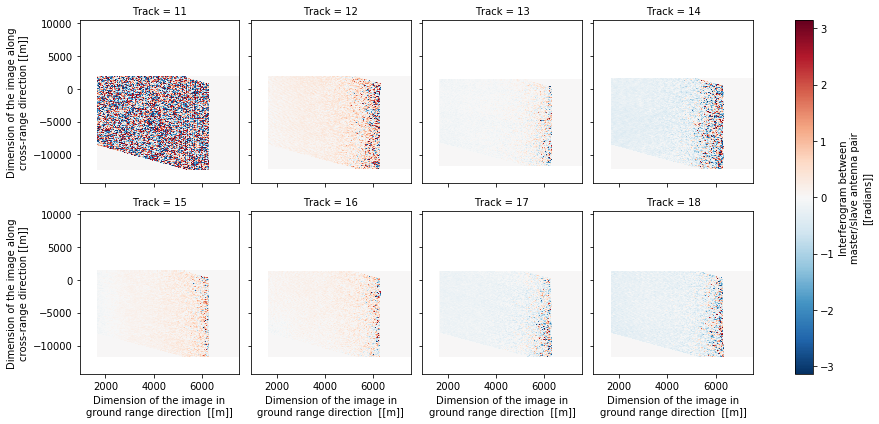

In [12]:
L1.sel(Track=[11,12,13,14,15,16,17,18])\
    .sel(Antenna='Aft')\
    .Interferogram\
    .plot(col='Track',col_wrap=4)

<Figure size 1296x288 with 0 Axes>

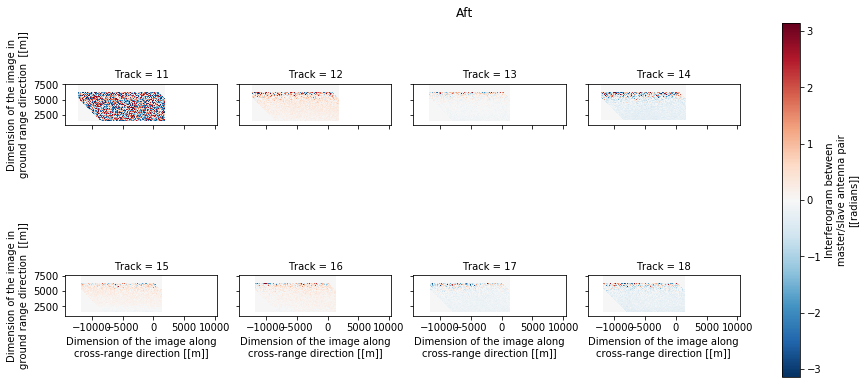

<Figure size 1296x288 with 0 Axes>

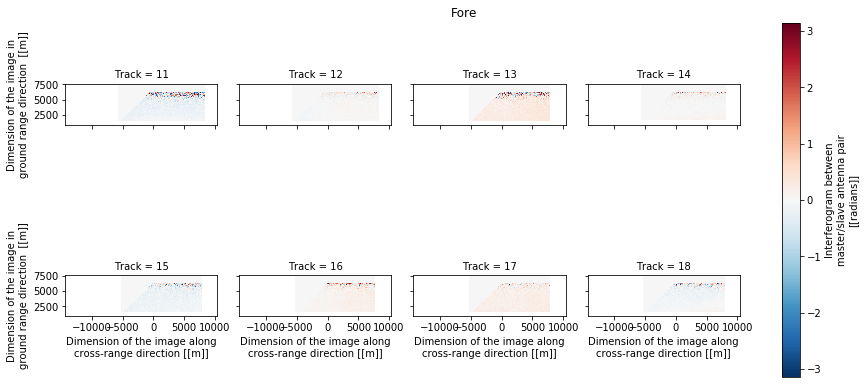

<Figure size 1296x288 with 0 Axes>

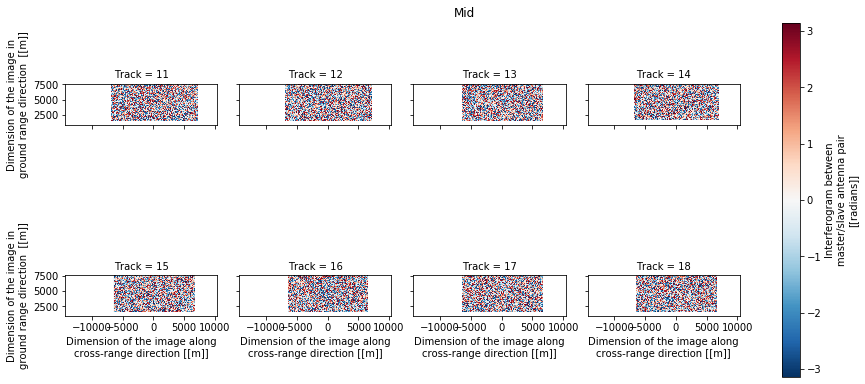

In [13]:
for antenna in L1.Antenna:
    plt.figure(figsize=(18,4))
    g = L1.sel(Track=[11,12,13,14,15,16,17,18])\
        .sel(Antenna=antenna)\
        .Interferogram\
        .plot(y='GroundRange', x='CrossRange', 
              col='Track',col_wrap=4,
             )
    for i, ax in enumerate(g.axes.flat):
        ax.set_aspect('equal')
    g.fig.suptitle(antenna.data[()])

/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


<Figure size 1296x432 with 0 Axes>

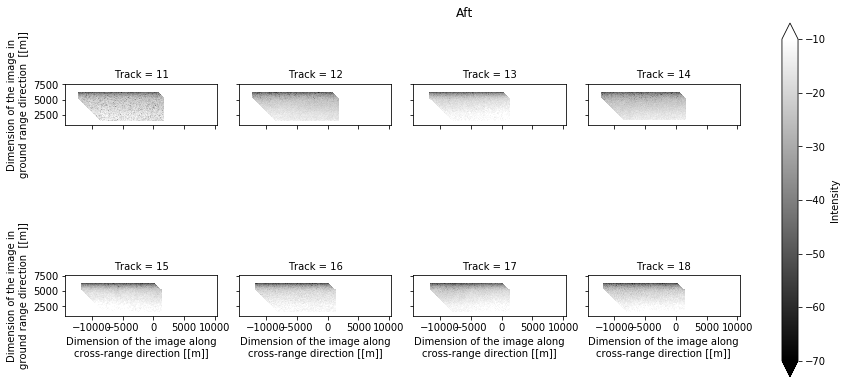

<Figure size 1296x432 with 0 Axes>

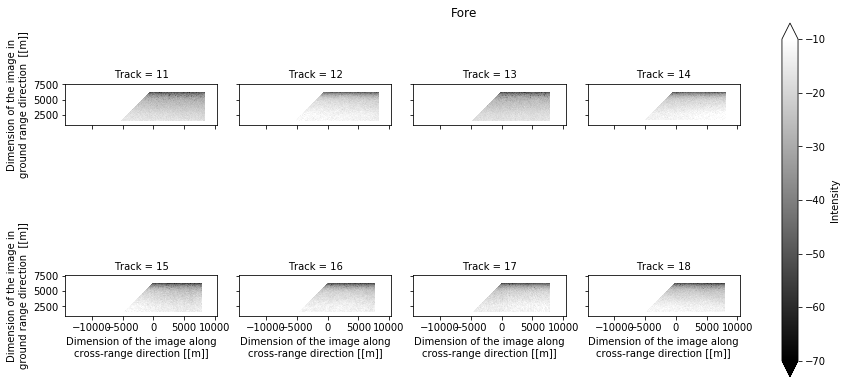

<Figure size 1296x432 with 0 Axes>

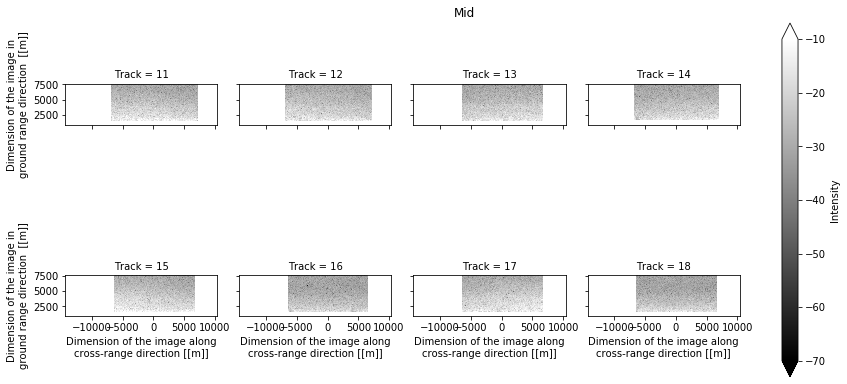

In [14]:
for antenna in L1.Antenna:
    plt.figure(figsize=(18,6))
    g = (10*np.log10(L1)).sel(Track=[11,12,13,14,15,16,17,18])\
        .sel(Antenna=antenna)\
        .Intensity\
        .plot(y='GroundRange', x='CrossRange', 
              col='Track',col_wrap=4, 
              vmin=-70, vmax=-10, 
              cmap='gist_gray',)
    for i, ax in enumerate(g.axes.flat):
        ax.set_aspect('equal')
    g.fig.suptitle(antenna.data[()])


In [13]:
# # Compute L2
# ds_l1_star = dict()
# ds_l2_star = dict()
# for track in star_pattern_tracks.keys(): # Loop through star pattern tracks
#     # Generating geophysical data fields for GMF doppler computation, data taken from DAR
#     u10 = 5 # wind speed
#     wind_direction = 25 # wind direction
#     aux = ss.oscar.level1.init_auxiliary(ds_l1_star[track], u10, wind_direction)
#     # Compute RSC
#     dsl1 = ss.oscar.level1.compute_radial_surface_current(dsl1, aux, gmf='mouche12')
#     #L2 Processing
#     # Initialise l2 dataset
#     dsl2=ss.oscar.level1.init_level2(dsl1)
#     # Compute current magnitude and direction
#     dsl2=seastar.retrieval.level2.compute_current_magnitude_and_direction(dsl1, dsl2)
#     # Compute current vectors
#     dsl2['CurrentVectorUComponent'], dsl2['CurrentVectorVComponent'] =\
#     ss.utils.tools.currentVelDir2UV(dsl2['CurrentMagnitude'], dsl2['CurrentDirection'])
#     ds_l2_star[track] = dsl2
#     ds_l1_star[track] = dsl1





In [15]:
L1

<xarray.Dataset>
Dimensions:                    (Antenna: 3, CrossRange: 3091, GroundRange: 830, Track: 12)
Coordinates:
  * GroundRange                (GroundRange) float64 928.0 936.0 ... 7.56e+03
  * Antenna                    (Antenna) object 'Aft' 'Fore' 'Mid'
  * CrossRange                 (CrossRange) float64 -1.434e+04 ... 1.038e+04
    longitude                  (Track, CrossRange, GroundRange) float64 nan ....
    latitude                   (Track, CrossRange, GroundRange) float64 nan ....
  * Track                      (Track) int64 0 100 200 101 11 ... 14 15 16 17 18
Data variables:
    AntennaAzimuthImage        (Track, Antenna, CrossRange, GroundRange) float64 ...
    IncidenceAngleImage        (Track, Antenna, CrossRange, GroundRange) float64 ...
    RadialSurfaceVelocity      (Track, Antenna, CrossRange, GroundRange) float64 ...
    Coherence                  (Track, Antenna, CrossRange, GroundRange) float64 ...
    Intensity                  (Track, Antenna, CrossRange, GroundRange) float64 ...
    Interferogram              (Track, Antenna, CrossRange, GroundRange) float64 ...
    OrbitHeadingImage          (Track, Antenna, CrossRange, GroundRange) float64 ...
    SquintImage                (Track, Antenna, CrossRange, GroundRange) float64 ...
    SquintFixed                (Track, Antenna, CrossRange, GroundRange) float64 ...
    AntennaAzimuthSquintFixed  (Track, Antenna, CrossRange, GroundRange) float64 ...
Attributes:
    Title:     Track : 20220522T052218
    Source:    MetaSensing Airborne SAR
    History:   05-Nov-2022 00:22:33 File Generation
    Comments:  /media/Y/BREST_PROJECT/20220522T052218

In [16]:
valid_ground_range = slice(1680,6300)

In [17]:
# set up a DataSet with median along track for the different Tracks as a new dim
coords_list = [
    'AntennaAzimuthImage',
    'IncidenceAngleImage',
    'AntennaAzimuthSquintFixed',
]

star_tracks_list = ['Track_11', 'Track_12', 'Track_13', 'Track_14', 'Track_15', 'Track_16', 'Track_17', 'Track_18']
Track_star_list = [11, 12, 13, 14, 15, 16, 17, 18]

med = L1.sel(GroundRange=valid_ground_range)\
        .sel(Track=Track_star_list)[vars_list + coords_list]\
        .median(dim='CrossRange')
siqr = L1.sel(GroundRange=valid_ground_range)\
        .sel(Track=Track_star_list)[vars_list + coords_list]\
        .map(iqr, dim='CrossRange')
med = med.set_coords(coords_list)
siqr = siqr.set_coords(coords_list)


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1392: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1392: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


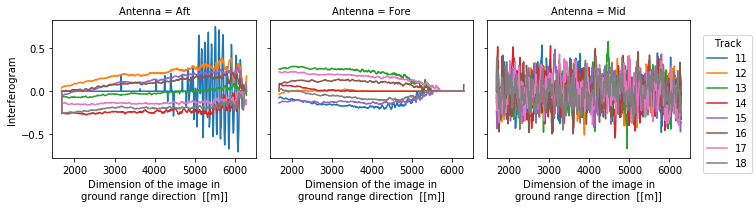

In [18]:
med.Interferogram.plot(col='Antenna', hue='Track')

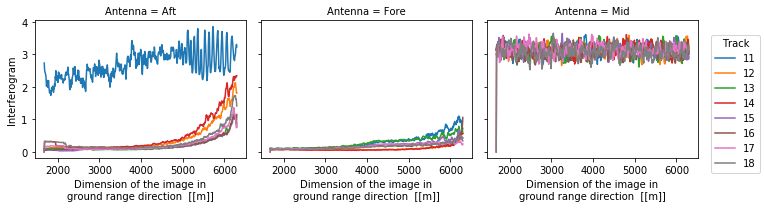

In [19]:
siqr.Interferogram.plot(col='Antenna', hue='Track')

(-40, 0)

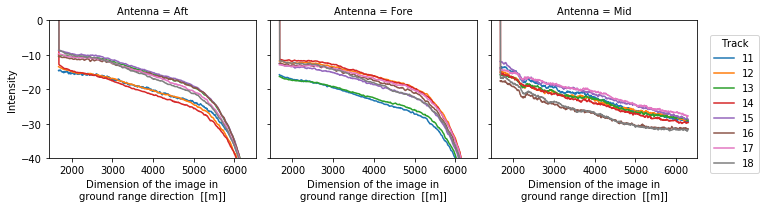

In [20]:
(10*np.log10(med.Intensity)).plot(col='Antenna', hue='Track')
plt.ylim([-40,0])

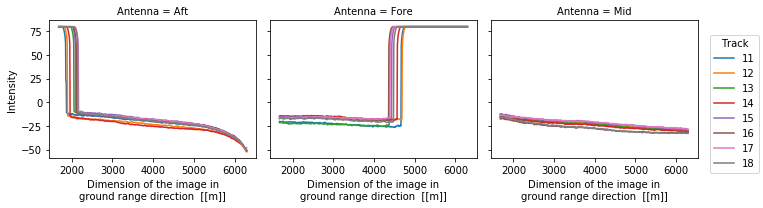

In [21]:
(10*np.log10(siqr.Intensity)).plot(col='Antenna', hue='Track')
# plt.ylim([-50,0])

# Fit 2D - azimuth, theta

In [22]:
def fit_func(xt, a0, a1, a2, a3, a4, b0, b1, b2, c0, c1, c2, f):
    x, t = xt # x = azimuth; t = theta
    g = (a0+a1*t+a2*t**2+a3**3+a4**4) * (
            1\
            + (b0+b1*t+b2*t**2)*np.cos(np.radians(x-f))\
            + (c0+c1*t+c2*t**2)*np.cos(np.radians(2*(x-f)))
        )
    return(g.ravel())

In [23]:
# def fit_func(xt, a0, a1, a2, b0, b1, b2, c0, c1, c2, f):
#     x, t = xt # x = azimuth; t = theta
#     g = a0+a1*t+a2*t**2\
#         + (b0+b1*t+b2*t**2)*np.cos(np.radians(x-f))\
#         + (c0+c1*t+c2*t**2)*np.cos(np.radians(2*(x-f)))
#     return(g.ravel())

In [24]:
x = med.sel(Antenna='Fore')\
        .AntennaAzimuthSquintFixed\
        .data
t = med.sel(Antenna='Fore')\
        .IncidenceAngleImage\
        .data
data = 10*np.log10(med.sel(Antenna='Fore')\
        .Intensity\
        .data)
popt, pcov = curve_fit( fit_func, (x.ravel(), t.ravel()),  data.ravel())

In [25]:
popt

array([-1.58953421e+01,  4.50753957e+00, -4.56364020e-02, -4.75607163e+00,
        5.31874336e-01,  6.94437405e-01, -2.36883539e-02,  1.91857534e-04,
       -6.48018958e-01,  3.55272978e-02, -3.58364144e-04, -4.55821768e+01])

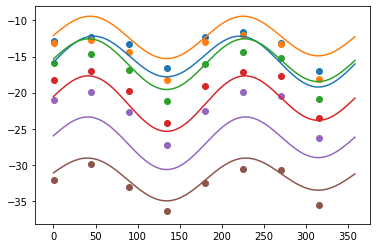

In [26]:

inci_index = np.arange(20,600,100)
for index in inci_index:
    x0 = np.arange(0,359)
    t0 = t[0,index]
    plt.plot(x0, fit_func((x0, t0), *popt))
    plt.scatter(x[:,index], data[:,index])

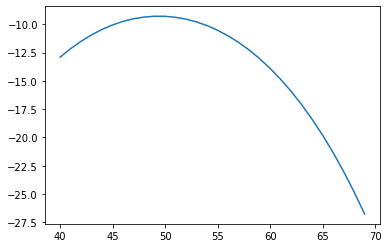

In [27]:
t0 = np.arange(40,70)
x0 = 44
plt.plot(t0, fit_func( (x0, t0), *popt) )

# GroupBy Incidence Angle

In [22]:
inci_bins = np.arange(30.5, 71.5, 1)
inci_center = np.arange(31, 71, 1)

# azimuth = np.zeros((med.Track.size, med.Antenna.size, len(inci_center)) ) # variable with inci angle
azimuth = np.zeros((med.Track.size, med.Antenna.size) )
intensity_data = np.zeros( (med.Track.size, med.Antenna.size, len(inci_center)) )
interferogram_data = np.zeros( (med.Track.size, 2, len(inci_center)) )
coherence_data = np.zeros( (med.Track.size, 2, len(inci_center)) )

for itrack, track in enumerate(med.Track):
    for iantenna, antenna in enumerate(med.Antenna):
#         azimuth[itrack, iantenna, :] = med.AntennaAzimuthSquintFixed.sel(Track=track, Antenna=antenna)\
#                                     .groupby_bins('IncidenceAngleImage', inci_bins, labels=inci_center).mean().data
        azimuth[itrack, iantenna] = med.AntennaAzimuthSquintFixed.sel(Track=track, Antenna=antenna)\
                                        .mean().data # constant with inci angle
        intensity_data[itrack, iantenna, :] = med.Intensity.sel(Track=track, Antenna=antenna)\
                                    .groupby_bins('IncidenceAngleImage', inci_bins, labels=inci_center).mean().data
        if not antenna.data[()] == 'Mid':
            interferogram_data[itrack, iantenna, :] = med.Interferogram.sel(Track=track, Antenna=antenna)\
                                    .groupby_bins('IncidenceAngleImage', inci_bins, labels=inci_center).mean().data
            coherence_data[itrack, iantenna, :] = med.Coherence.sel(Track=track, Antenna=antenna)\
                                    .groupby_bins('IncidenceAngleImage', inci_bins, labels=inci_center).mean().data
        if track == 11 and antenna == 'Aft':
            intensity_data[itrack, iantenna, :] = np.nan
            interferogram_data[itrack, iantenna, :] = np.nan
            coherence_data[itrack, iantenna, :] = np.nan

In [23]:
nds = xr.Dataset(
    {
        "Intensity": (["Track", "Antenna", "inci"], 10*np.log10(intensity_data) ),
        "Interferogram": (["Track", "AntennaSquint", "inci"], interferogram_data ),
        "Coherence": (["Track", "AntennaSquint", "inci"], coherence_data ),
    },
    coords={
#         "azimuth": (["Track", "Antenna", "inci"], azimuth),
        "azimuth": (["Track", "Antenna"], azimuth),
        "azimuthSquint": (["Track", "AntennaSquint"], azimuth[:,:-1]),
        "inci": (["inci"], inci_center),
        "Track": (["Track"], med.Track),
        "Antenna": (["Antenna"], med.Antenna),
        "AntennaSquint": (["AntennaSquint"], med.Antenna.drop_sel(Antenna=['Mid'])),
    }
)


In [24]:
def fit_func_simple(az, A, B, C, f):
    g = A * (
            1\
            + np.sign(A)*B*np.cos(np.radians(az-f))\
            + np.sign(A)*C*np.cos(np.radians(2*(az-f)))
        )
    return(g.ravel())

In [25]:
def fit_func_simple2(az, A, B, C, f):
    g = A   + B*np.cos(np.radians(az-f))\
            + C*np.cos(np.radians(2*(az-f))
        )
    return(g.ravel())

In [28]:
inci_joint = np.arange(40,66)
az = np.arange(0,360)
nb_parameters = 4
Intensity_popt = np.zeros( (med.Antenna.size, len(inci_joint), nb_parameters) )
Interferogram_popt = np.zeros( (nds.AntennaSquint.size, len(inci_joint), nb_parameters) )
Coherence_popt = np.zeros( (nds.AntennaSquint.size, len(inci_joint), nb_parameters) )
for iantenna, antenna in enumerate(med.Antenna):
    for ii, inci_value in enumerate(inci_joint):
        lds = nds.sel(Antenna=antenna, inci=inci_value)
        if antenna == 'Aft':
#             lds = nds.sel(Antenna=antenna, inci=inci_value, Track=[12,13,14,15,16,17,18]) # remove nan for Track 11
#             lds = lds.sel(Track=[12,13,14,15,16,17,18]) # remove nan for Track 11
            lds = lds.drop_sel(Track=[11]) # remove nan for Track 11
        Intensity_popt[iantenna, ii, :], pcov = curve_fit( 
            fit_func_simple, lds.azimuth.data.ravel(),  lds.Intensity.data.ravel(),
            check_finite=True, 
            p0=[-15, 0.02, 0.2, 180], 
            bounds=([-50, 0, 0, 0], [+10, 1, 1, 360]) 
        )
        if not antenna.data[()] == 'Mid':
            lds = lds.sel(AntennaSquint=antenna)
            Interferogram_popt[iantenna, ii, :], pcov = curve_fit(
                fit_func_simple2, lds.azimuthSquint.data.ravel(),  lds.Interferogram.data.ravel(),
                bounds=([-np.pi, 0.01, 0, 0], [+np.pi, 10, 10, 360]) 
            )
            Coherence_popt[iantenna, ii, :], pcov = curve_fit(
                fit_func_simple, lds.azimuthSquint.data.ravel(),  lds.Coherence.data.ravel(),
                bounds=([0, 0, 0, 0], [1, 1, 1, 360]) 
#                 fit_func_simple3, lds.azimuthSquint.data.ravel(),  lds.Coherence.data.ravel(),
#                 bounds=([0, 0, 0, 0], [100, 1, 1, 360]) 

            )

In [29]:
fit = xr.Dataset(
    {
        "Intensity_popt": (["Antenna", "inci", "parameters"], Intensity_popt),
        "Interferogram_popt": (["AntennaSquint", "inci", "parameters"], Interferogram_popt),
        "Coherence_popt": (["AntennaSquint", "inci", "parameters"], Coherence_popt),

    },
    coords={
        "parameters": (["parameters"], ["A", "B", "C", "f"]),
        "inci": (["inci"], inci_joint),
        "Antenna": (["Antenna"], med.Antenna),
        "AntennaSquint": (["AntennaSquint"], nds.AntennaSquint),
    }
)

### Intensity

In [88]:
nds.sel(inci=slice(35,70,5)).plot.scatter(x='azimuth',y='IntensitySlave', hue='Antenna',
                                          col='inci', col_wrap=4)
nds.sel(inci=slice(35,70,5)).plot.scatter(x='azimuth',y='IntensityMaster', hue='Antenna',
                                          col='inci', col_wrap=4)


ValueError: y must be one of (inci, Track, azimuth, Intensity, azimuthSquint, Antenna, AntennaSquint, Interferogram, Coherence)

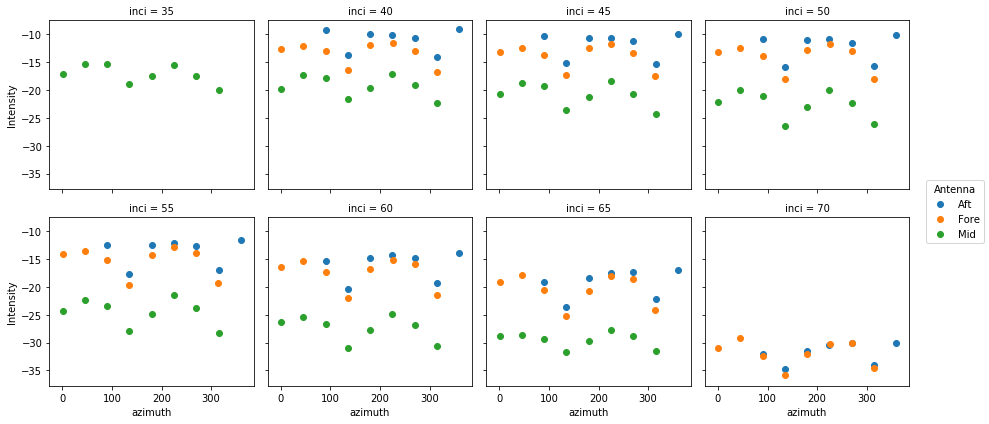

In [30]:
nds.sel(inci=slice(35,70,5)).plot.scatter(x='azimuth',y='Intensity', hue='Antenna',
                                          col='inci', col_wrap=4)

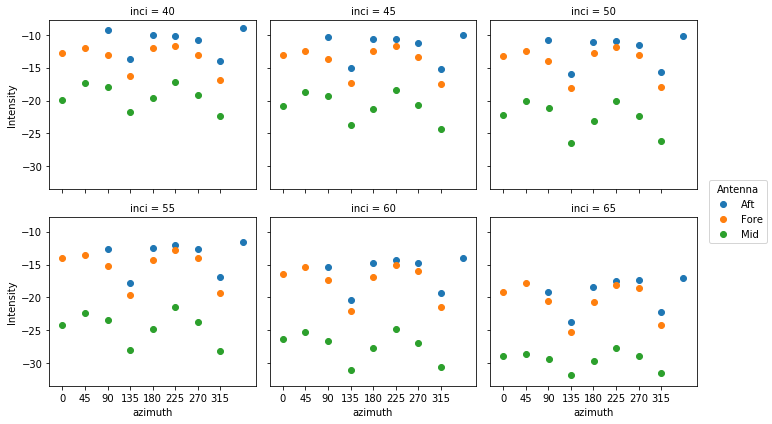

In [31]:
g = nds.sel(inci=slice(40,65,5)).plot.scatter(x='azimuth',y='Intensity', hue='Antenna',
                                          col='inci', col_wrap=3)
for i, ax in enumerate(g.axes.flat):
    ax.set_xticks(np.arange(0,360,45))
#     inci_value = g.col_names[i]
#     plt.plot(az, fit_func_simple(az, *fit.sel(Antenna='Aft', inci=inci_value).Intensity_popt.data), 'C0')
#     plt.plot(az, fit_func_simple(az, *fit.sel(Antenna='Fore', inci=inci_value).Intensity_popt.data), 'C1')
#     plt.plot(az, fit_func_simple(az, *fit.sel(Antenna='Mid', inci=inci_value).Intensity_popt.data), 'C2')

In [32]:
u10 = 6 #m/s
updir = 45 # deg North-East



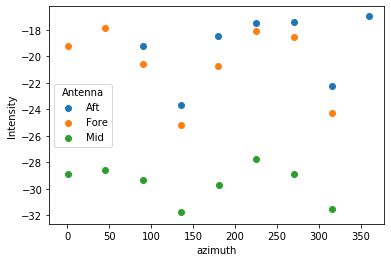

In [33]:
nds.sel(inci=inci_value).plot.scatter(x='azimuth',y='Intensity', hue='Antenna')

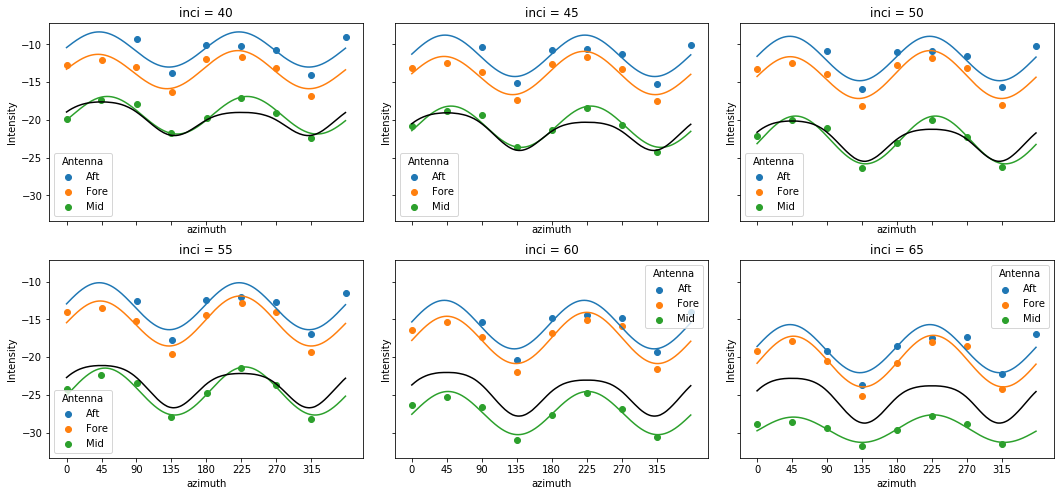

In [37]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18,8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
axs = axs.ravel()
for ii, inci_value in enumerate(np.arange(40,66,5)):
    nds.sel(inci=inci_value)\
        .plot.scatter(x='azimuth',y='Intensity', hue='Antenna',ax=axs[ii])
    axs[ii].plot(az, fit_func_simple(az, *fit.sel(Antenna='Aft', inci=inci_value).Intensity_popt.data), 'C0')
    axs[ii].plot(az, fit_func_simple(az, *fit.sel(Antenna='Fore', inci=inci_value).Intensity_popt.data), 'C1')
    axs[ii].plot(az, fit_func_simple(az, *fit.sel(Antenna='Mid', inci=inci_value).Intensity_popt.data), 'C2')
    axs[ii].set_xticks(np.arange(0,360,45))
    axs[ii].set_title('inci = ' + str(inci_value))
    # plot dummy curve
#     axs[ii].plot(az, fit_func_simple(az, -15, 0.1, 0.2, updir), '--k')
    # plot nscat
    ones = np.ones(np.size(az))
    nscat = 10*np.log10(
            ss.gmfs.nrcs.nscat4ds( 
                u10*ones,
                np.abs(np.mod(az - updir +180, 360) - 180),
                inci_value*ones,
                ones
            )
    )
    axs[ii].plot(az, nscat, 'k',label='NSCAT4DS')
                 
                 

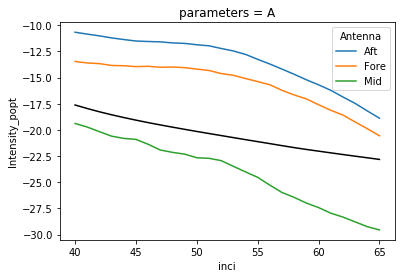

In [38]:
ones = np.ones(np.size(inci_joint))
nscat = 10*np.log10(
        ss.gmfs.nrcs.nscat4ds( 
            u10*ones,
            0*ones,
            inci_joint,
            ones
        )
)

fit.Intensity_popt.sel(parameters='A').plot(hue='Antenna')
plt.plot(inci_joint, nscat, 'k', label='NSCAT upwind')
# plt.legend()

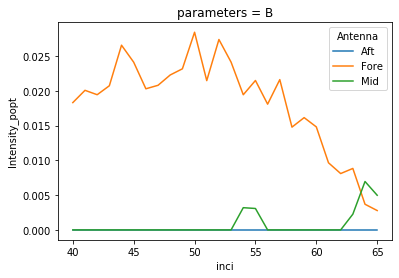

In [39]:
fit.Intensity_popt.sel(parameters='B').plot(hue='Antenna')

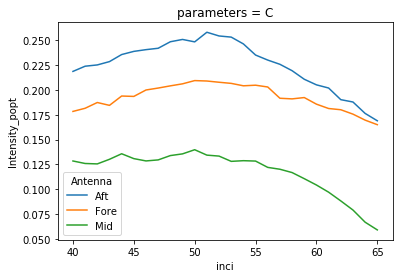

In [40]:
fit.Intensity_popt.sel(parameters='C').plot(hue='Antenna')

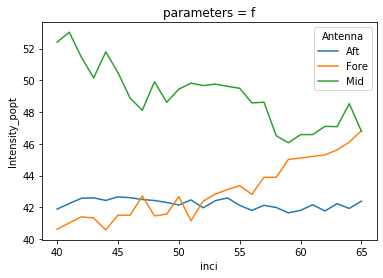

In [41]:
np.mod(fit.Intensity_popt.sel(parameters='f'), 180).plot(hue='Antenna')

In [42]:
fit.Intensity_popt.sel(parameters='f')

<xarray.DataArray 'Intensity_popt' (Antenna: 3, inci: 26)>
array([[221.88718003, 222.24150085, 222.57203672, 222.59725172,
        222.43730898, 222.66256913, 222.60940551, 222.49361224,
        222.43190479, 222.30701004, 222.15087428, 222.46909934,
        221.97000473, 222.42253856, 222.5935434 , 222.12518865,
        221.81009558, 222.12720627, 221.99305345, 221.65334331,
        221.81092674, 222.16619504, 221.77265018, 222.23254173,
        221.93349807, 222.39356285],
       [220.61648759, 221.01929443, 221.4026962 , 221.32877371,
        220.57905462, 221.50862947, 221.50097031, 222.71450521,
        221.46516403, 221.5730031 , 222.67615182, 221.15481009,
        222.39100105, 222.8357333 , 223.12473463, 223.36431906,
        222.81976643, 223.89537222, 223.89271473, 225.02141146,
        225.10421895, 225.21009827, 225.30169978, 225.61814899,
        226.10629467, 226.82742545],
       [232.40232623, 233.029774  , 231.45521185, 230.15307575,
        231.79318931, 230.49208984, 228.88115785, 228.11429117,
        229.91303615, 228.61715487, 229.44774135, 229.82062425,
        229.67339915, 229.76330027, 229.62385395, 229.49943265,
        228.58156497, 228.62149836, 226.5096551 , 226.07077054,
        226.58024722, 226.58649811, 227.10094015, 227.08311606,
        228.53266718, 226.79051777]])
Coordinates:
    parameters  <U1 'f'
  * inci        (inci) int64 40 41 42 43 44 45 46 47 ... 58 59 60 61 62 63 64 65
  * Antenna     (Antenna) object 'Aft' 'Fore' 'Mid'

### Intensity bias

#### between Fore and Aft

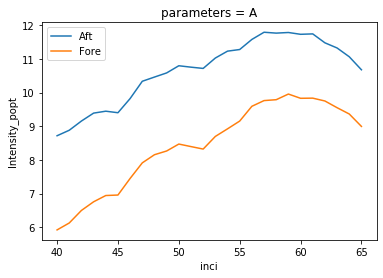

In [47]:
IA = fit.Intensity_popt.sel(parameters='A')
(IA.sel(Antenna='Aft') - IA.sel(Antenna='Mid')).plot(label='Aft')
(IA.sel(Antenna='Fore') - IA.sel(Antenna='Mid')).plot(label='Fore')
plt.legend()

#### compared to NSCAT

In [52]:
s0diff = np.full( (len(az), len(inci_joint), 3 ), np.nan )
for ii, inci_value in enumerate(inci_joint):
    ones = np.ones(np.size(az))
    nscat = 10*np.log10(
            ss.gmfs.nrcs.nscat4ds( 
                u10*ones,
                np.abs(np.mod(az - updir +180, 360) - 180),
                inci_value*ones,
                ones
            ))

    s0diff[:,ii,0] = fit_func_simple(az, *fit.sel(Antenna='Aft', inci=inci_value).Intensity_popt.data)\
                - nscat 
    s0diff[:,ii,1] = fit_func_simple(az, *fit.sel(Antenna='Fore', inci=inci_value).Intensity_popt.data)\
                - nscat
    s0diff[:,ii,2] = fit_func_simple(az, *fit.sel(Antenna='Mid', inci=inci_value).Intensity_popt.data)\
                - nscat

Text(0, 0.5, 'Azimuth [deg]')

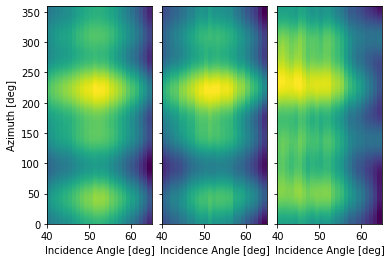

In [56]:
fig, axs = plt.subplots(ncols=3, nrows=1, sharey=True, gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
axs = axs.ravel()
for ii in range(3): # antennas
    axs[ii].pcolormesh(inci_joint, az, s0diff[:,:,ii])
    axs[ii].set_xlabel('Incidence Angle [deg]')
axs[0].set_ylabel('Azimuth [deg]')
# fig.colorbar()

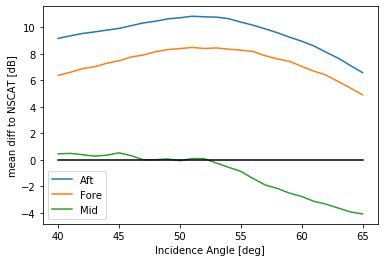

In [83]:
plt.plot(inci_joint, s0diff.mean(axis=0))
plt.plot(inci_joint[[0,-1]], [0,0], 'k')
plt.xlabel('Incidence Angle [deg]')
plt.ylabel('mean diff to NSCAT [dB]')
plt.legend(fit.Antenna.data)

### Coherence

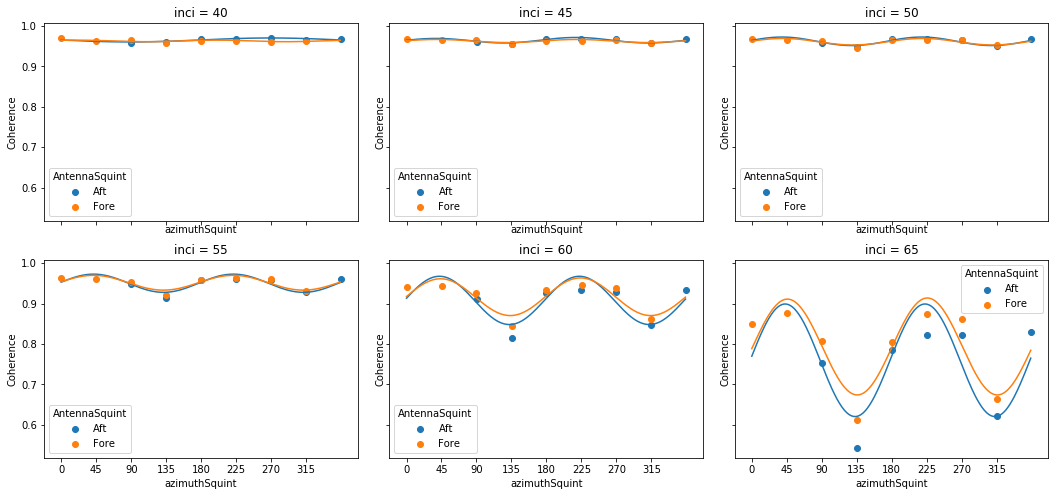

In [58]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18,8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
axs = axs.ravel()
for ii, inci_value in enumerate(np.arange(40,66,5)):
    nds.sel(inci=inci_value).plot.scatter(x='azimuthSquint',y='Coherence', hue='AntennaSquint',
                                          ax=axs[ii])
#     axs[ii].plot(az,)
    axs[ii].plot(az, fit_func_simple(az, *fit.sel(AntennaSquint='Aft', inci=inci_value).Coherence_popt.data), 'C0')
    axs[ii].plot(az, fit_func_simple(az, *fit.sel(AntennaSquint='Fore', inci=inci_value).Coherence_popt.data), 'C1')
    axs[ii].set_xticks(np.arange(0,360,45))
    axs[ii].set_title('inci = ' + str(inci_value))

    

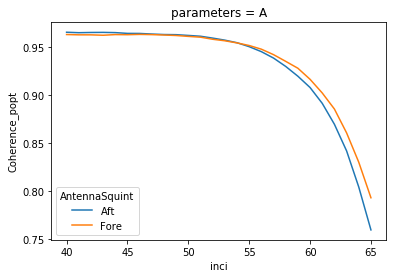

In [59]:
fit.Coherence_popt.sel(parameters='A').plot(hue='AntennaSquint')

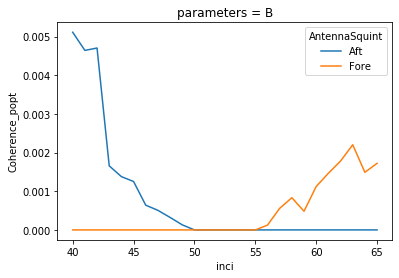

In [60]:
fit.Coherence_popt.sel(parameters='B').plot(hue='AntennaSquint')

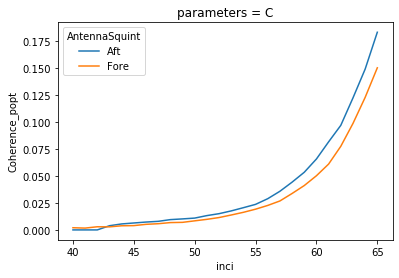

In [61]:
fit.Coherence_popt.sel(parameters='C').plot(hue='AntennaSquint')

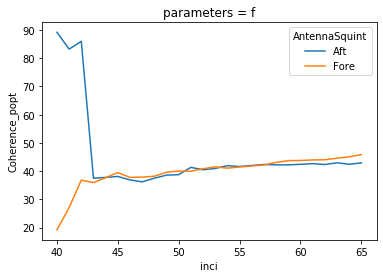

In [62]:
np.mod(fit.Coherence_popt.sel(parameters='f'), 180).plot(hue='AntennaSquint')

In [63]:
fit.Coherence_popt.sel(parameters='f')

<xarray.DataArray 'Coherence_popt' (AntennaSquint: 2, inci: 26)>
array([[269.22507906, 263.23374047, 266.02068093, 217.49386808,
        217.77591176, 218.10895157, 216.88949376, 216.19963451,
        217.49170825, 218.57873625, 218.74407142, 221.33507713,
        220.47380658, 220.94772764, 221.93157504, 221.64057022,
        221.99536685, 222.34412031, 222.23257783, 222.20967754,
        222.41017816, 222.66409121, 222.33673748, 222.95325675,
        222.42443594, 222.92389158],
       [199.16206406, 207.08976407, 216.79850008, 215.93592172,
        217.67140779, 219.48264774, 217.78077594, 217.87745126,
        218.18838311, 219.59962163, 220.03225471, 219.95169742,
        220.8361708 , 221.50794427, 221.05212402, 221.4639464 ,
        221.80940228, 222.19683748, 223.08969869, 223.71708257,
        223.77845629, 223.95879305, 224.03374519, 224.57011694,
        225.08133045, 225.86188347]])
Coordinates:
    parameters     <U1 'f'
  * inci           (inci) int64 40 41 42 43 44 45 46 47 ... 59 60 61 62 63 64 65
  * AntennaSquint  (AntennaSquint) object 'Aft' 'Fore'

### Interferogram

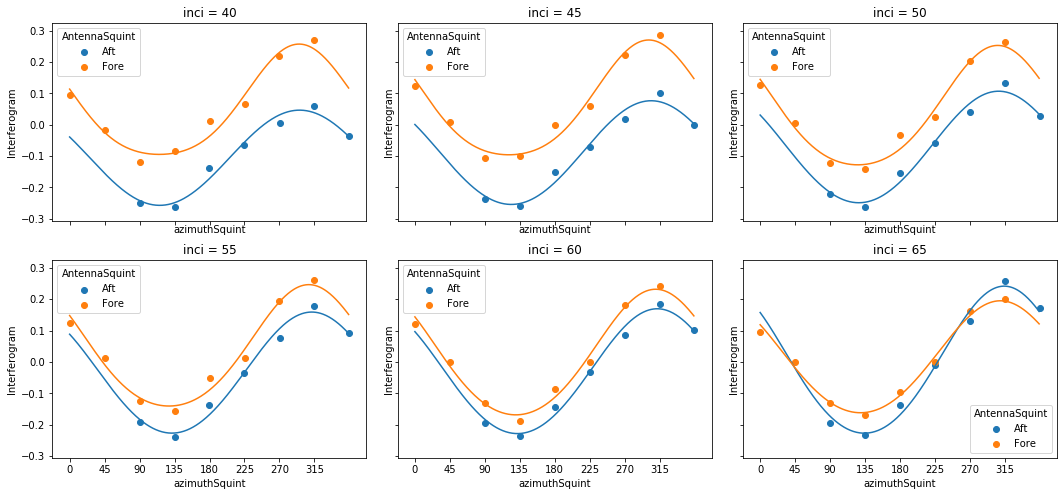

In [64]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18,8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
axs = axs.ravel()
for ii, inci_value in enumerate(np.arange(40,66,5)):
    nds.sel(inci=inci_value).plot.scatter(x='azimuthSquint',y='Interferogram', hue='AntennaSquint',
                                          ax=axs[ii])
#     axs[ii].plot(az,)
    axs[ii].plot(az, fit_func_simple2(az, *fit.sel(AntennaSquint='Aft', inci=inci_value).Interferogram_popt.data), 'C0')
    axs[ii].plot(az, fit_func_simple2(az, *fit.sel(AntennaSquint='Fore', inci=inci_value).Interferogram_popt.data), 'C1')
    axs[ii].set_xticks(np.arange(0,360,45))
    axs[ii].set_title('inci = ' + str(inci_value))

    

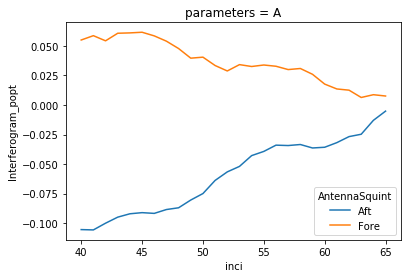

In [65]:
fit.Interferogram_popt.sel(parameters='A').plot(hue='AntennaSquint')

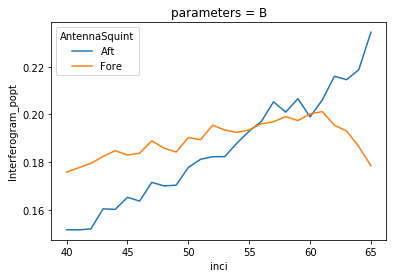

In [66]:
fit.Interferogram_popt.sel(parameters='B').plot(hue='AntennaSquint')

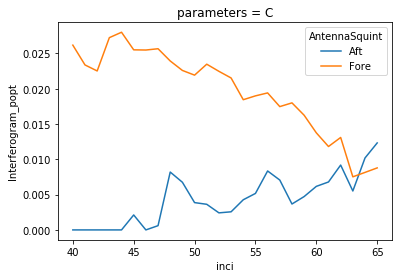

In [67]:
fit.Interferogram_popt.sel(parameters='C').plot(hue='AntennaSquint')

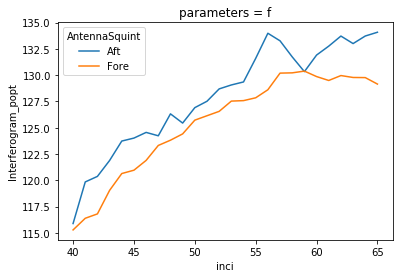

In [68]:
np.mod(fit.Interferogram_popt.sel(parameters='f'), 180).plot(hue='AntennaSquint')

### Phase bias between Fore and Aft

In [69]:
phasediff = np.zeros( (len(az), len(inci_joint) ) )
for ii, inci_value in enumerate(inci_joint):
    phasediff[:,ii] = (
        fit_func_simple2(az, *fit.sel(AntennaSquint='Aft', inci=inci_value).Interferogram_popt.data)
        - fit_func_simple2(az, *fit.sel(AntennaSquint='Fore', inci=inci_value).Interferogram_popt.data)
        )
phasediffmean = phasediff.mean()

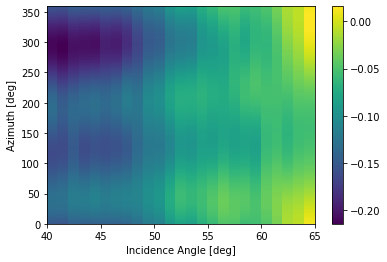

In [70]:
plt.pcolormesh(inci_joint, az, phasediff)
plt.xlabel('Incidence Angle [deg]')
plt.ylabel('Azimuth [deg]')
plt.colorbar()

Text(0, 0.5, 'Mean interferogram diff "Aft - Fore" [rad]')

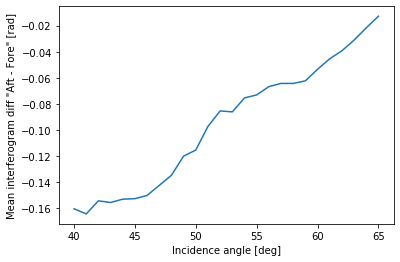

In [71]:
plt.plot(inci_joint, phasediff.mean(axis=0))
plt.xlabel('Incidence angle [deg]')
plt.ylabel('Mean interferogram diff "Aft - Fore" [rad]')

In [72]:
# TODO add the GMF, what we expect

# Ouessant

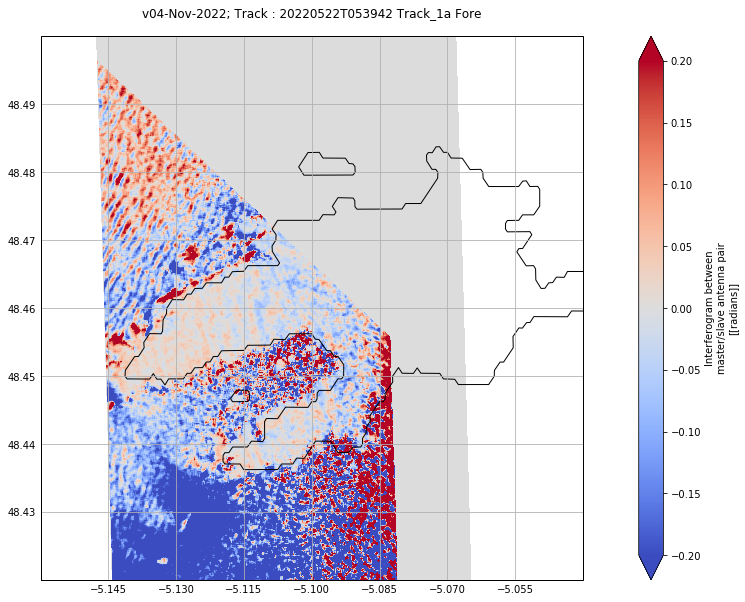

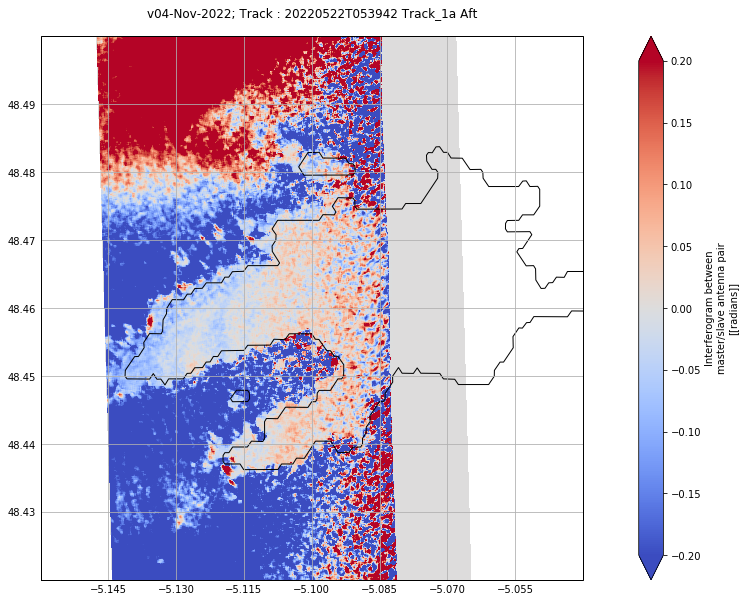

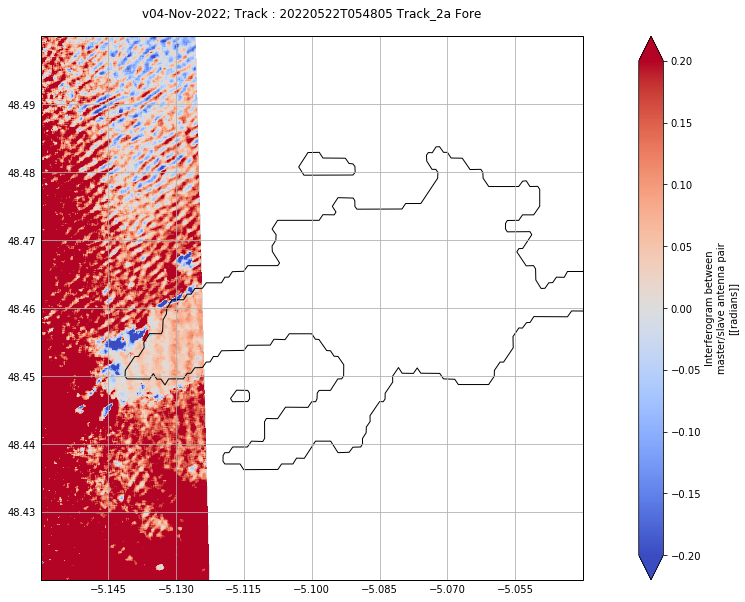

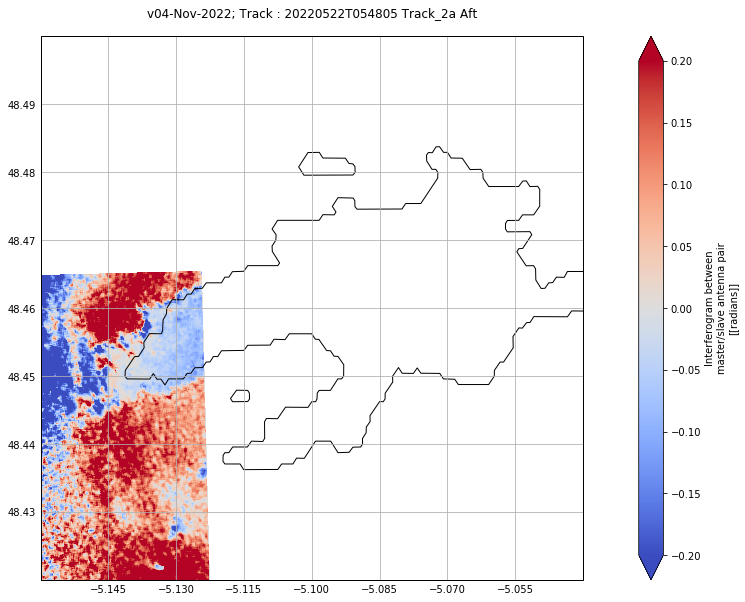

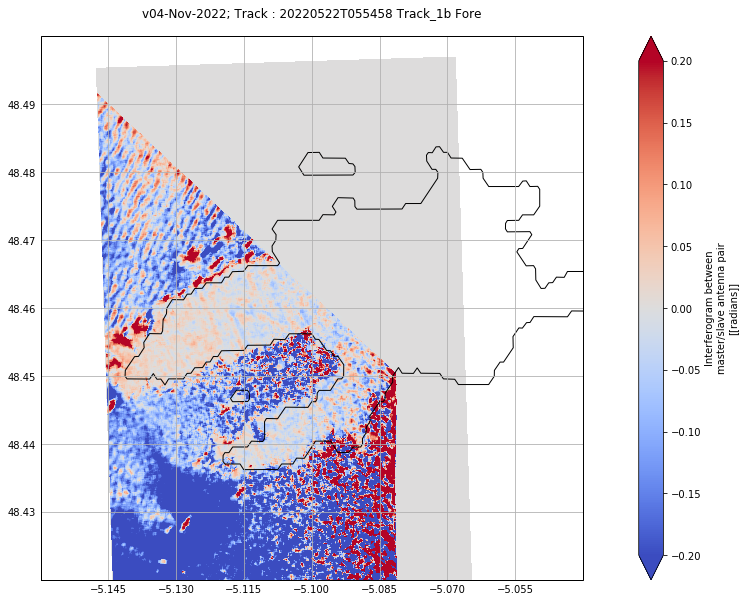

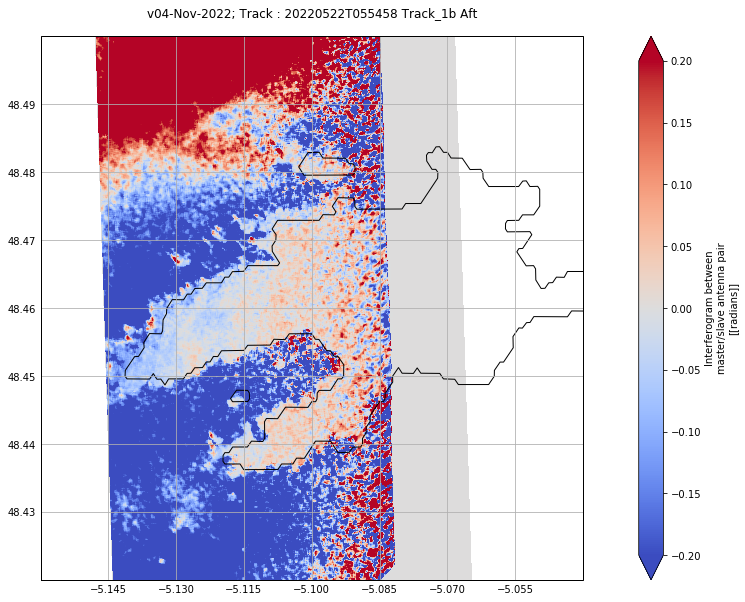

In [79]:
ouessant_tracks = ['Track_1a', 'Track_2a', 'Track_1b']

extent_bias = [-5.16, -5.04, 48.42, 48.50]

for track in ouessant_tracks:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Fore')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree(),
            vmin=-0.2, vmax=0.2,
            cmap='coolwarm',
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
         + '; ' + dsl1[track].Title + ' ' + track + ' Fore'
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
#     ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.set_extent(extent_bias, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Aft')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree(),
            vmin=-0.2, vmax=0.2,
            cmap='coolwarm'
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
        + '; ' + dsl1[track].Title + ' ' + track + ' Aft'
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
#     ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.set_extent(extent_bias, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))


## Phase bias over Ouessant

In [ ]:

ss.utils.tools.compute_land_mask_from_GSHHS()




In [74]:
ouessant_tracks = ['Track_1a']
mask = ss.utils.tools.compute_land_mask_from_GSHHS(dsl1['Track_1a'])

KeyboardInterrupt: 

In [ ]:
dsl1[track]

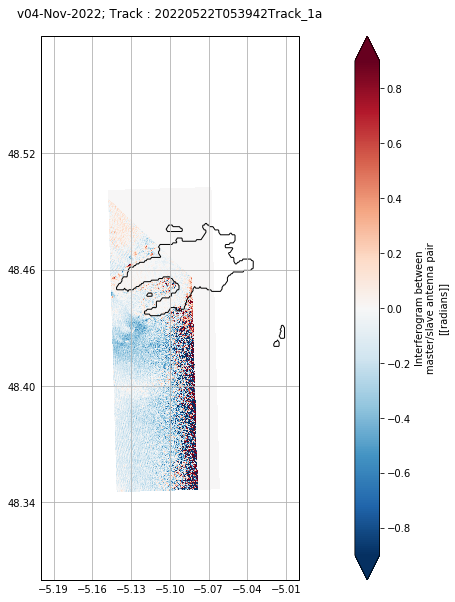

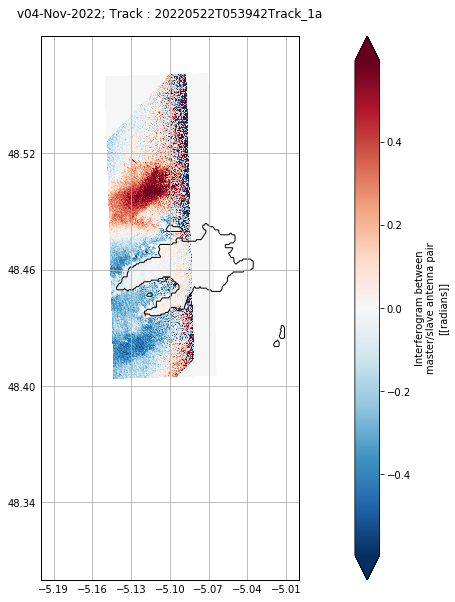

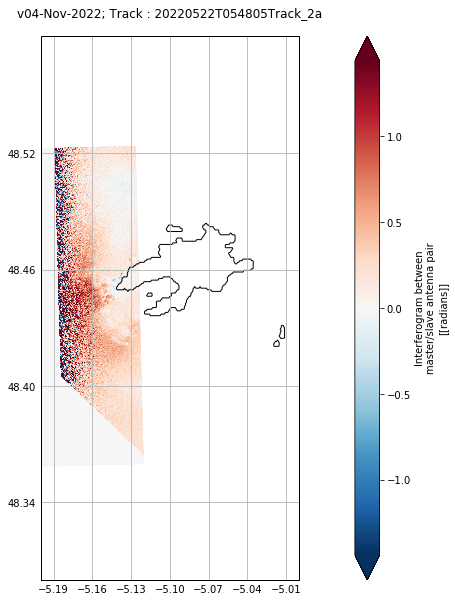

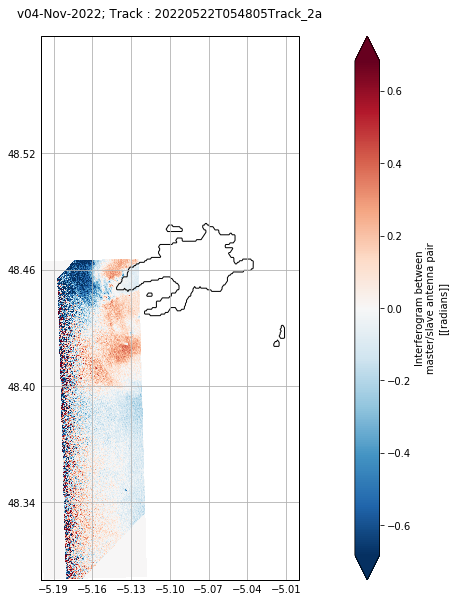

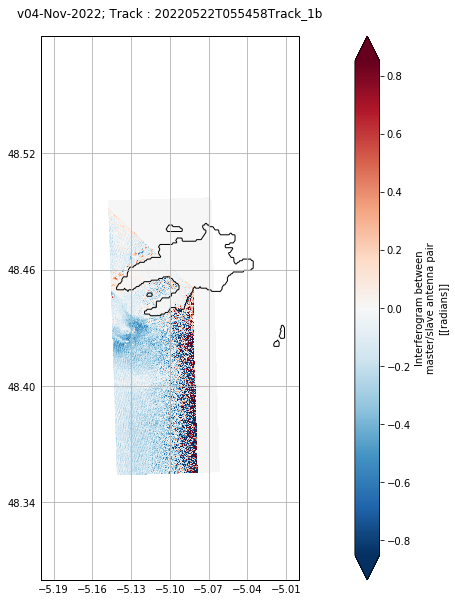

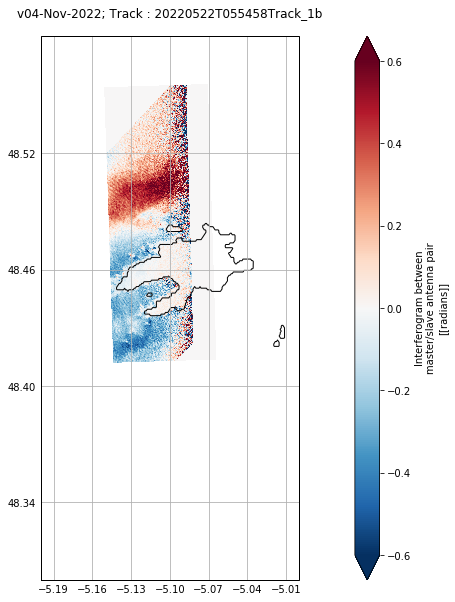

In [63]:
ouessant_tracks = ['Track_1a', 'Track_2a', 'Track_1b']

for track in ouessant_tracks:
    mask
    
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Fore')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree()
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
         + '; ' + dsl1[track].Title + track
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Aft')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree()
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
        + '; ' + dsl1[track].Title + track
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))


# Land

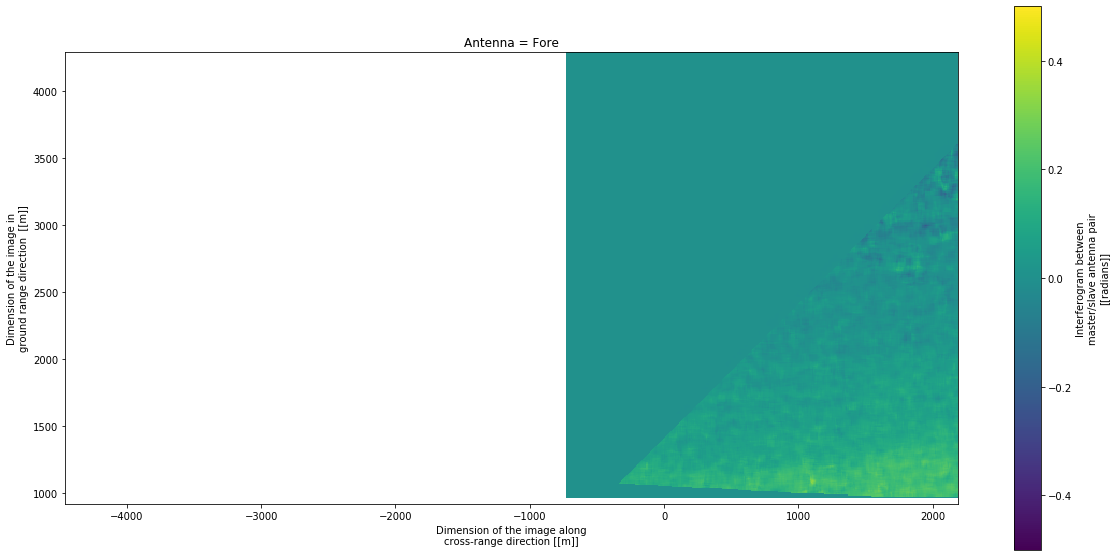

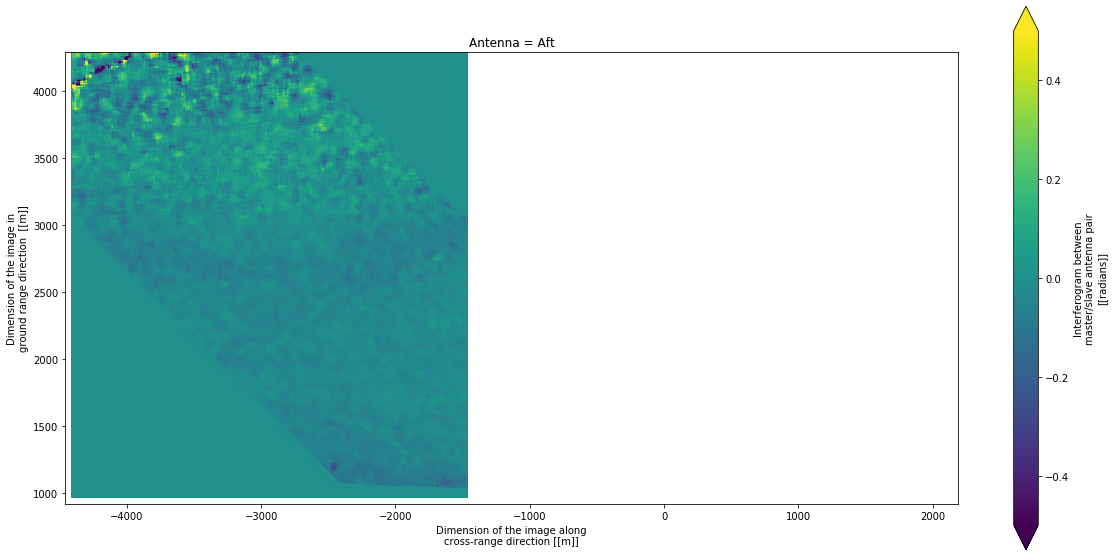

In [64]:
fig = plt.figure(figsize=(20, 10))
ax = dsl1['Track_L1'].sel(Antenna='Fore')\
    .Interferogram.plot(
        y='GroundRange', x='CrossRange',
        vmin=-0.5, vmax=0.5,

)
ax.axes.set_aspect('equal')

fig = plt.figure(figsize=(20, 10))
ax = dsl1['Track_L1'].sel(Antenna='Aft')\
    .Interferogram.plot(
        y='GroundRange', x='CrossRange',
        vmin=-0.5, vmax=0.5,

)
ax.axes.set_aspect('equal')

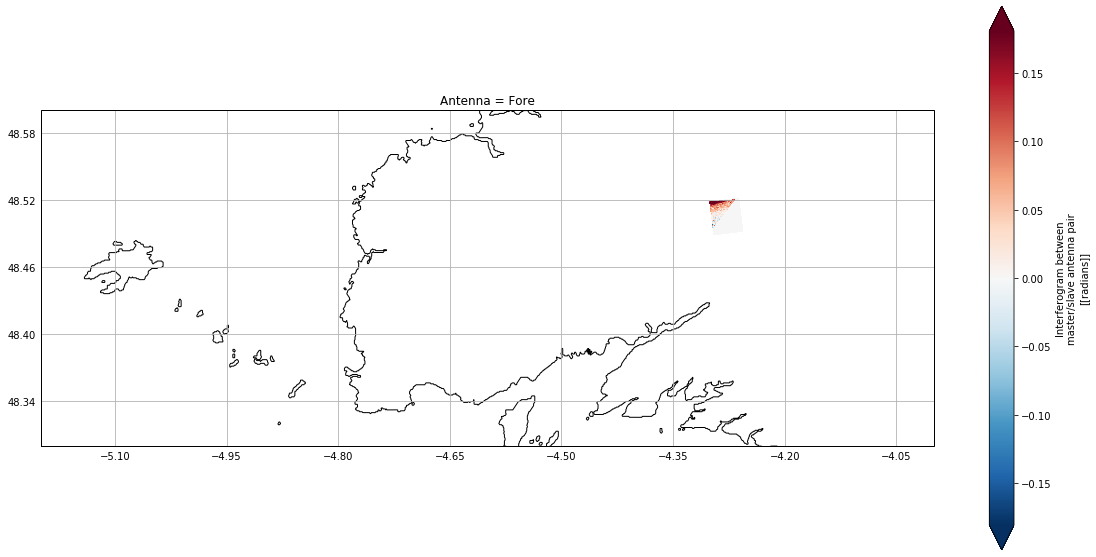

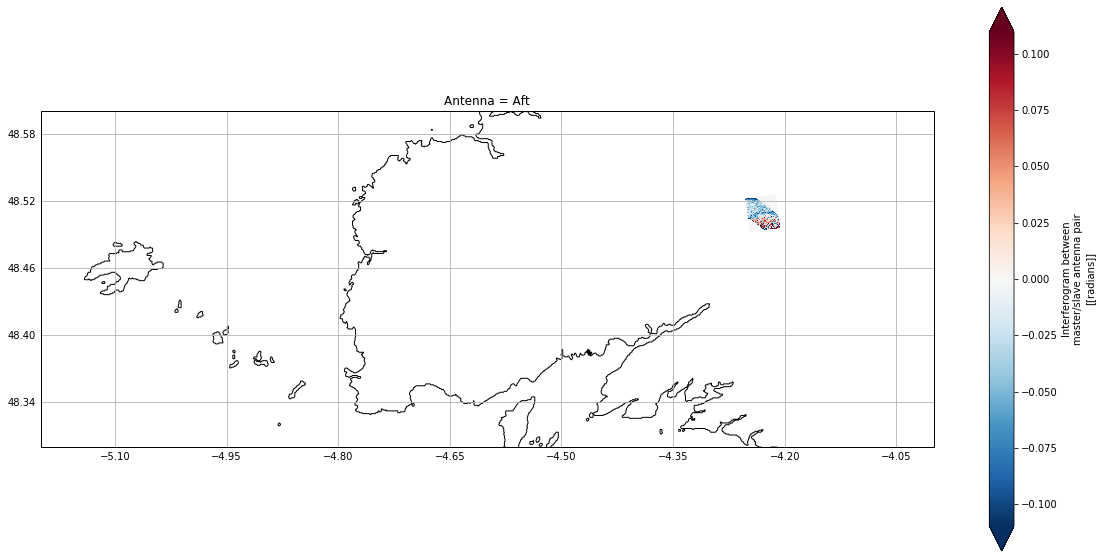

In [65]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
dsl1['Track_L1'].sel(Antenna='Fore')\
    .Interferogram.plot(
        y='latitude',
        x='longitude',
        robust=True,
        transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False
ax.set_extent([-5.2, -4.0, 48.30, 48.6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature())

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
dsl1['Track_L1'].sel(Antenna='Aft')\
    .Interferogram.plot(
        y='latitude',
        x='longitude',
        robust=True,
        transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False
ax.set_extent([-5.2, -4.0, 48.30, 48.6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature())